In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, roc_curve
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier

from scipy.stats import kurtosis
from scipy.stats import skew
import csv

import tensorflow as tf
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
df = pd.read_csv("/content/drive/My Drive/EE461P_Project/Data.csv")
# dataset.head(5)

['blues' 'classical' 'country' 'disco' 'hiphop' 'jazz' 'metal' 'pop'
 'reggae' 'rock']


Text(0.5, 1.0, 'Embedded space with LDA')

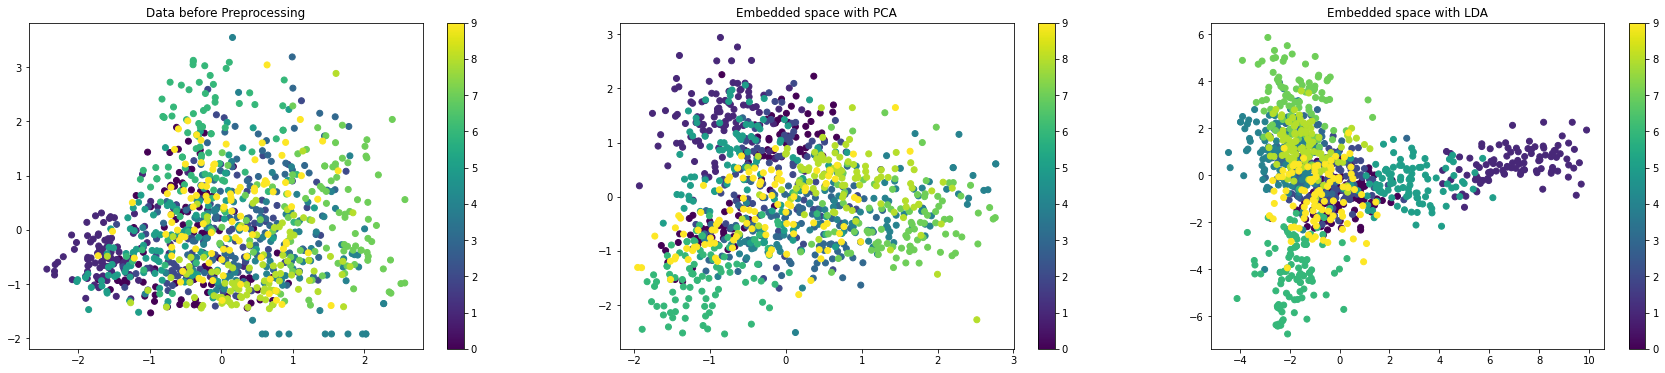

In [5]:
# Data from Dataframe
X = df.drop(['genre'], axis=1)
y = df['genre']

# Scaling X Data
scale = StandardScaler()
x_scaled = pd.DataFrame(scale.fit_transform(X), columns = X.columns)

# Encoding Y Data to integer from 0-9
encoder = LabelEncoder()
y_enc = encoder.fit_transform(y)

#Performing LDA
lda = LDA()
x_lda = lda.fit_transform(x_scaled, y_enc)

x_train, x_test, y_train, y_test = train_test_split(x_scaled, y_enc, test_size=0.25, random_state=42)
x_train_lda, x_test_lda, y_train_lda, y_test_lda = train_test_split(x_lda, y_enc, test_size=0.25, random_state=42)

# User for iterations below
dataset = []
dataset.append([x_train, x_test, y_train, y_test])
dataset.append([x_train_lda, x_test_lda, y_train_lda, y_test_lda])
xtrain, xtest, ytrain, ytest = range(0,4)

pca = PCA(n_components=5, whiten=True)
x_pca = pca.fit_transform(x_scaled)

print(np.unique(encoder.inverse_transform(y_enc)))
plt.figure(figsize=(30, 6))
plt.subplot(131)
plt.scatter(x_scaled.iloc[:,0], x_scaled.iloc[:,1], c=y_enc)
plt.colorbar()
plt.title("Data before Preprocessing")

plt.subplot(132)
plt.scatter(x_pca[:,0], x_pca[:,1], c=y_enc)
plt.colorbar()
plt.title("Embedded space with PCA")

plt.subplot(133)
plt.scatter(x_lda[:,0], x_lda[:,1], c=y_enc)
plt.colorbar()
plt.title("Embedded space with LDA")


# x_train.shape

In [0]:
# First Model: LogisticRegression:
lr_accuracy = []
for data in dataset:
  lr = LogisticRegression(max_iter=1500, random_state=42)
  lr.fit(data[xtrain], data[ytrain])
  lr_accuracy.append(accuracy_score(data[ytest], lr.predict(data[xtest])))

print('LogisticRegression         : {0:.3f}'.format(lr_accuracy[0]))
print('LogisticRegression with LDA: {0:.3f}'.format(lr_accuracy[1]))
print('LDA resulted in a {0:.3f} point increase ({1:.2%}).'.format(lr_accuracy[1]-lr_accuracy[0], (lr_accuracy[1]/lr_accuracy[0])-1))

RandomForestClassifier         : 0.776
RandomForestClassifier with LDA: 0.864
LDA resulted in a 0.088 point increase (11.34%).


In [0]:
# Second Model: RandomForestClassifier
rfc_accuracy = []
for data in dataset:
  rfc = RandomForestClassifier(random_state=42)
  rfc.fit(data[xtrain], data[ytrain])
  rfc_accuracy.append(accuracy_score(data[ytest], rfc.predict(data[xtest])))

print('RandomForestClassifier         : {0:.3f}'.format(rfc_accuracy[0]))
print('RandomForestClassifier with LDA: {0:.3f}'.format(rfc_accuracy[1]))
print('LDA resulted in a {0:.3f} point increase ({1:.2%}).'.format(rfc_accuracy[1]-rfc_accuracy[0], (rfc_accuracy[1]/rfc_accuracy[0])-1))

RandomForestClassifier         : 0.724
RandomForestClassifier with LDA: 0.852
LDA resulted in a 0.128 point increase (17.68%).


In [0]:
# Third Model: NaiveBayes
gnb_accuracy = []
for data in dataset:
  gnb = GaussianNB()
  gnb.fit(data[xtrain], data[ytrain])
  gnb_accuracy.append(accuracy_score(data[ytest], gnb.predict(data[xtest])))

print('NaiveBayes         : {0:.3f}'.format(gnb_accuracy[0]))
print('NaiveBayes with LDA: {0:.3f}'.format(gnb_accuracy[1]))
print('LDA resulted in a {0:.3f} point increase ({1:.2%}).'.format(gnb_accuracy[1]-gnb_accuracy[0], (gnb_accuracy[1]/gnb_accuracy[0])-1))

NaiveBayes         : 0.552
NaiveBayes with LDA: 0.880
LDA resulted in a 0.328 point increase (59.42%).


In [0]:
# Fourth Model: SGDClassifier
sgd_accuracy = []
for data in dataset:
  sgd = SGDClassifier(loss="hinge", penalty="l2", max_iter=2000, random_state=42)
  sgd.fit(data[xtrain], data[ytrain])
  sgd_accuracy.append(accuracy_score(data[ytest], sgd.predict(data[xtest])))

print('SGDClassifier         : {0:.3f}'.format(sgd_accuracy[0]))
print('SGDClassifier with LDA: {0:.3f}'.format(sgd_accuracy[1]))
print('LDA resulted in a {0:.3f} point increase ({1:.2%}).'.format(sgd_accuracy[1]-sgd_accuracy[0], (sgd_accuracy[1]/sgd_accuracy[0])-1))

SGDClassifier         : 0.728
SGDClassifier with LDA: 0.808
LDA resulted in a 0.080 point increase (10.99%).


In [40]:
# Final Model: TerasSequential
epochs = 20
batch_size = 64 # On average the best

seq_history = []
seq_accuracy = []
for data in dataset:
  seq = Sequential()
  seq.add(Dense(512, activation='relu', input_shape=(data[xtrain].shape[1],)))
  seq.add(Dense(256, activation='relu'))
  seq.add(Dense(128, activation='relu'))
  seq.add(Dense(64, activation='relu'))
  seq.add(Dense(10, activation='softmax'))

  seq.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
  history = seq.fit(data[xtrain], data[ytrain], epochs=epochs, batch_size=batch_size, validation_data=(data[xtest], data[ytest]), verbose=0)
  seq_history.append(history)
  test_loss, test_acc = seq.evaluate(data[xtest], data[ytest], verbose=0)
  seq_accuracy.append(test_acc)
  # print(accuracy_score(data[ytest], seq.pre(data[xtest])))

print('TerasSequential         : {0:.3f} (~0.74-0.77 on average)'.format(seq_accuracy[0]))
print('TerasSequential with LDA: {0:.3f} (~0.84-0.87 on average)'.format(seq_accuracy[1]))
print('LDA resulted in a {0:.3f} point increase ({1:.2%}) (~7-17% on average)'.format(seq_accuracy[1]-seq_accuracy[0], (seq_accuracy[1]/seq_accuracy[0])-1))


TerasSequential         : 0.756 (~0.74-0.77 on average)
TerasSequential with LDA: 0.860 (~0.84-0.87 on average)
LDA resulted in a 0.104 point increase (13.76%) (~7-17% on average)


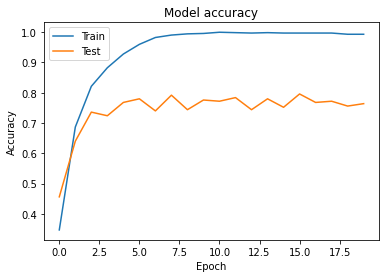

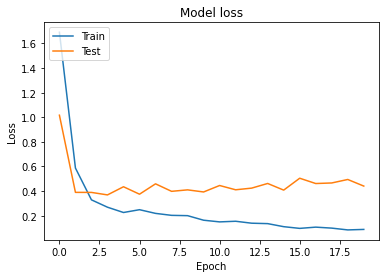

In [0]:

# Plot training & validation accuracy values
plt.plot(seq_history[0].history['accuracy'])
plt.plot(seq_history[0].history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(seq_history[0].history['loss'])
plt.plot(seq_history[0].history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [0]:
# Use this to print class based accuracies, i.e how successful a model ranks classical music

def model_class_ranking_success(model, isSequential, useLDA):
  print('Class Based Test Accuracies:')
  accuracy_list = []
  for index, genre in enumerate(np.unique(encoder.inverse_transform(y_enc))):
    start_index = index * 100
    end_index = (index+1) * 100
    x_genre = x_lda[start_index:end_index] if useLDA else x_scaled[start_index:end_index]
    y_genre = y_enc[start_index:end_index]
    
    if isSequential:
      test_loss, test_acc = model.evaluate(x_genre, y_genre, verbose=0)
      accuracy_list.append((genre.title(), test_acc))
    else:
      accuracy_list.append((genre.title(), accuracy_score(y_genre, model.predict(x_genre))))

  accuracy_list = sorted(accuracy_list, key=lambda x: x[1], reverse=True)
  for genre, test_acc in accuracy_list:
    print('{0:9}: {1:.3f}'.format(genre.title(), test_acc))


In [8]:
lr = LogisticRegression(max_iter=1500, random_state=42)
lr.fit(dataset[0][xtrain], dataset[0][ytrain])

gnb = GaussianNB()
gnb.fit(dataset[1][xtrain], dataset[1][ytrain])

model_class_ranking_success(gnb, False, True)

Class Based Test Accuracies:
Classical: 0.980
Jazz     : 0.950
Blues    : 0.940
Metal    : 0.940
Hiphop   : 0.910
Reggae   : 0.890
Disco    : 0.880
Pop      : 0.880
Country  : 0.860
Rock     : 0.820


# Feature Extraction Code

In [0]:
#@title
def get_features(y, sr):
    # Features to concatenate in the final dictionary
    features = {'centroid': None, 'roloff': None, 'flux': None, 'rmse': None,
                'zcr': None, 'contrast': None, 'bandwidth': None, 'flatness': None, 'chroma_stft': None}
    
    # Count silence
    if 0 < len(y):
        y_sound, _ = librosa.effects.trim(y)
    features['sample_silence'] = len(y) - len(y_sound)

    # Using librosa to calculate the features
    features['chroma_stft']=librosa.feature.chroma_stft(y=y, sr=sr).ravel()
    features['centroid'] = librosa.feature.spectral_centroid(y, sr=sr).ravel()
    features['roloff'] = librosa.feature.spectral_rolloff(y, sr=sr,).ravel()
    features['zcr'] = librosa.feature.zero_crossing_rate(y).ravel()
    features['rmse'] = librosa.feature.rms(y).ravel()
    features['flux'] = librosa.onset.onset_strength(y=y, sr=sr).ravel()
    features['contrast'] = librosa.feature.spectral_contrast(y, sr=sr).ravel()
    features['bandwidth'] = librosa.feature.spectral_bandwidth(y, sr=sr).ravel()
    features['flatness'] = librosa.feature.spectral_flatness(y).ravel()
    
    # MFCC treatment
    mfcc = librosa.feature.mfcc(y, sr=sr, n_mfcc=13)
    for idx, v_mfcc in enumerate(mfcc):
        features['mfcc_{}'.format(idx)] = v_mfcc.ravel()
        
    # Get statistics from the vectors
    def get_moments(descriptors):
        result = {}
        for k, v in descriptors.items():
            result['{}_max'.format(k)] = np.max(v)
            result['{}_min'.format(k)] = np.min(v)
            result['{}_mean'.format(k)] = np.mean(v)
            result['{}_std'.format(k)] = np.std(v)
            result['{}_kurtosis'.format(k)] = kurtosis(v)
            result['{}_skew'.format(k)] = skew(v)
        return result
    
    dict_agg_features = get_moments(features)
    dict_agg_features['tempo'] = librosa.beat.tempo(y, sr=sr)[0]
    
    return dict_agg_features

In [71]:
# !pip install pafy
# !pip install youtube_dl
# !pip install pydub
import pafy, librosa, youtube_dl, warnings
from sklearn.preprocessing import MinMaxScaler
from pydub import AudioSegment

# All-Star - https://www.youtube.com/watch?v=5ZYgIrqELFw
# Livin on a Prayer - https://www.youtube.com/watch?v=fDjhZva-6LE
# Through the Fire and Flames - https://www.youtube.com/watch?v=Wbrrma9Cutk
# Lose Yourself - https://www.youtube.com/watch?v=tR1ECf4sEpw
# September - https://www.youtube.com/watch?v=wBNewLDy3pQ

with warnings.catch_warnings():
  warnings.filterwarnings("ignore",category=DeprecationWarning)

  # Getting the video
  video_url = "https://www.youtube.com/watch?v=wBNewLDy3pQ"
  video = pafy.new(url=video_url, basic=False, gdata=False)
  stream = video.getbestaudio()
  filename = stream.download()
  print("Downloaded: '" + video.title + '.' + stream.extension + "'")

  # Convert to MP3
  name = 'song.mp3'
  wav_audio = AudioSegment.from_file((video.title + '.' + stream.extension), format=stream.extension)
  audio = wav_audio.export(name, format="mp3")
  print("Converted into: '" + name + "'")

  # Extract Features
  y, sr = librosa.load(name, duration = 30)
  features = get_features(y, sr)
  features['genre'] = 'hiphop'
  features = pd.DataFrame(features, index=[0])
  print("Successfully Extracted Features")

  # Creating/Training Model
  gnb = GaussianNB()
  gnb.fit(dataset[1][xtrain], dataset[1][ytrain])

  # Predicting Model
  genres = ['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']
  song_x = scale.transform(features.drop(['genre'], axis=1))
  song_x = lda.transform(song_x)
  song_y = features['genre']

  prediction = gnb.predict(song_x)
  predict_proba = gnb.predict_log_proba(song_x)

  proba_genre = dict(zip(genres, predict_proba[0]))
  proba_genre_sorted = sorted(proba_genre.items(), key=lambda x: x[1], reverse=True)

  # Printing Results
  print("===========")
  print("Predicted '" + video.title + "' as " + str(encoder.inverse_transform(prediction)[0]).title())
  print("Guess order is: ", end="")
  for x in proba_genre_sorted: print(x[0].title(), end=", ")



Downloaded: 'Earth Wind And Fire, September [lyrics].webm'
Converted into: 'song.mp3'
Successfully Extracted Features
Predicted 'Earth Wind And Fire, September [lyrics]' as Disco
Guess order is: Disco, Hiphop, Jazz, Classical, Rock, Country, Metal, Blues, Reggae, Pop, Next best guesses are: Hiphop and Jazz


In [37]:
import IPython.display as ipd
# audiopath = dataset_dir + 'classical/'+'classical.00000.wav'
ipd.Audio('song.mp3')